In [4]:
!pip install matplotlip

In [16]:
!pip install seaborn

In [36]:
!pip install pandas

In [43]:
import pandas as pd
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Number of samples
n = 1000

# Generate data
data = {
    'age': np.random.randint(20 * 365, 80 * 365, n),  # Age in days
    'height': np.random.randint(150, 200, n),  # Height in cm
    'weight': np.random.uniform(50, 150, n),  # Weight in kg
    'gender': np.random.choice([1, 2], n),  # 1 = Male, 2 = Female
    'ap_hi': np.random.randint(90, 180, n),  # Systolic BP
    'ap_lo': np.random.randint(60, 120, n),  # Diastolic BP
    'cholesterol': np.random.choice([1, 2, 3], n),  # Cholesterol levels
    'gluc': np.random.choice([1, 2, 3], n),  # Glucose levels
    'smoke': np.random.choice([0, 1], n),  # Smoking
    'alco': np.random.choice([0, 1], n),  # Alcohol intake
    'active': np.random.choice([0, 1], n),  # Physical activity
    'cardio': np.random.choice([0, 1], n)  # Cardiovascular disease
}

# Create DataFrame
df = pd.DataFrame(data)

# Adjust ap_lo to always be less than ap_hi
df['ap_lo'] = np.where(df['ap_lo'] > df['ap_hi'], df['ap_hi'] - np.random.randint(5, 15), df['ap_lo'])

# Save to CSV
df.to_csv('medical_examination.csv', index=False)

print("Dataset created and saved as 'medical_examination.csv'")


Dataset created and saved as 'medical_examination.csv'


In [45]:
import pandas as pd

# Load the dataset
df = pd.read_csv('medical_examination.csv')

# Display the first few rows of the dataset
print(df.head())

# Check the summary statistics and missing values
print(df.describe())
print(df.isnull().sum())


     age  height      weight  gender  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0  23095     188  138.370967       2    125     91            1     1      1   
1   8160     155   94.202437       2    113     99            1     1      1   
2  12690     155   83.088936       2    113     72            1     3      1   
3  28875     152   94.877757       1     93     87            2     3      0   
4  19264     156  116.939040       1    156     76            2     3      0   

   alco  active  cardio  
0     0       0       0  
1     1       1       1  
2     1       0       1  
3     0       1       0  
4     1       0       1  
                age       height       weight       gender        ap_hi  \
count   1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean   18208.059000   174.935000    99.313547     1.487000   135.550000   
std     6319.998607    14.184004    28.690044     0.500081    25.373634   
min     7309.000000   150.000000    50.018840     1.000000    9

In [47]:
# Calculate BMI
df['height_meters'] = df['height'] / 100  # Convert height to meters
df['bmi'] = df['weight'] / (df['height_meters'] ** 2)

# Create overweight column (1 for overweight, 0 for not)
df['overweight'] = df['bmi'].apply(lambda x: 1 if x > 25 else 0)

# Drop the temporary height_meters and bmi columns
df = df.drop(columns=['height_meters', 'bmi'])

# Display the updated dataset
print(df.head())


     age  height      weight  gender  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0  23095     188  138.370967       2    125     91            1     1      1   
1   8160     155   94.202437       2    113     99            1     1      1   
2  12690     155   83.088936       2    113     72            1     3      1   
3  28875     152   94.877757       1     93     87            2     3      0   
4  19264     156  116.939040       1    156     76            2     3      0   

   alco  active  cardio  overweight  
0     0       0       0           1  
1     1       1       1           1  
2     1       0       1           1  
3     0       1       0           1  
4     1       0       1           1  


In [49]:
# Normalize cholesterol and gluc columns
df['cholesterol'] = df['cholesterol'].apply(lambda x: 0 if x == 1 else 1)
df['gluc'] = df['gluc'].apply(lambda x: 0 if x == 1 else 1)

# Display the updated dataset
print(df.head())


     age  height      weight  gender  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0  23095     188  138.370967       2    125     91            0     0      1   
1   8160     155   94.202437       2    113     99            0     0      1   
2  12690     155   83.088936       2    113     72            0     1      1   
3  28875     152   94.877757       1     93     87            1     1      0   
4  19264     156  116.939040       1    156     76            1     1      0   

   alco  active  cardio  overweight  
0     0       0       0           1  
1     1       1       1           1  
2     1       0       1           1  
3     0       1       0           1  
4     1       0       1           1  


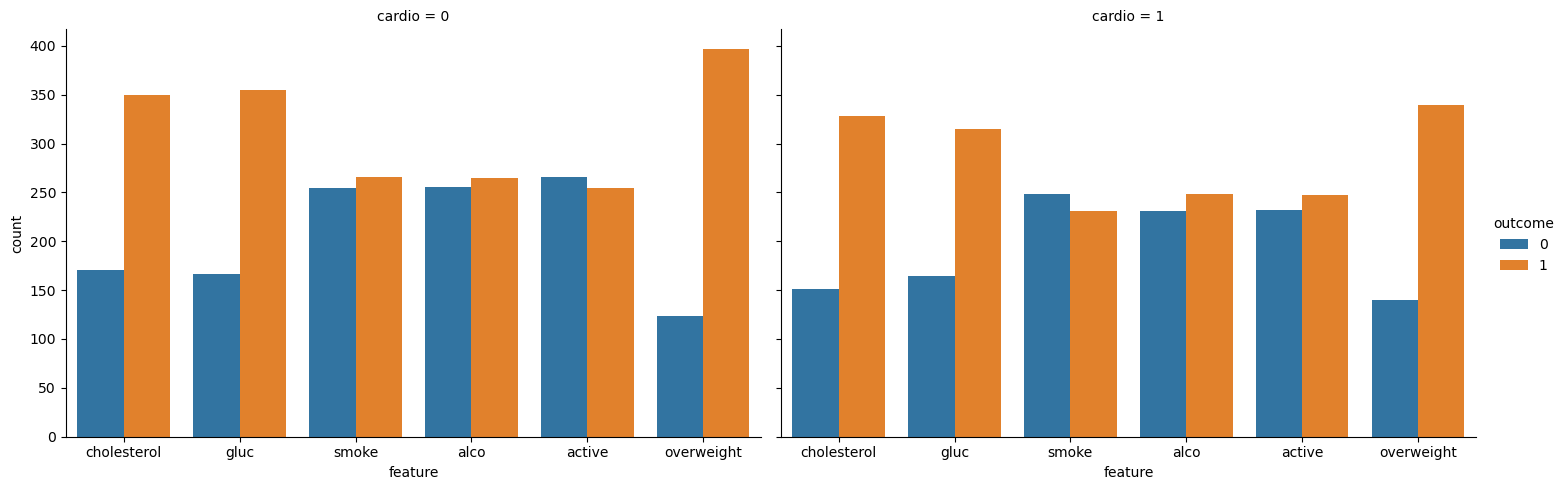

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a new DataFrame for the categorical plot
df_cat = pd.melt(df, id_vars=['cardio'], value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'])
df_cat = df_cat.rename(columns={'variable': 'feature', 'value': 'outcome'})

# Create the categorical plot
sns.catplot(x='feature', hue='outcome', col='cardio', data=df_cat, kind='count', height=5, aspect=1.5)

# Show the plot
plt.show()


In [60]:
# Filter out incorrect data
df_heat = df[
    (df['ap_lo'] <= df['ap_hi']) & 
    (df['height'] >= df['height'].quantile(0.025)) & (df['height'] <= df['height'].quantile(0.975)) & 
    (df['weight'] >= df['weight'].quantile(0.025)) & (df['weight'] <= df['weight'].quantile(0.975))
]

# Display the cleaned dataset
print(df_heat.head())


     age  height      weight  gender  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0  23095     188  138.370967       2    125     91            0     0      1   
1   8160     155   94.202437       2    113     99            0     0      1   
2  12690     155   83.088936       2    113     72            0     1      1   
3  28875     152   94.877757       1     93     87            1     1      0   
4  19264     156  116.939040       1    156     76            1     1      0   

   alco  active  cardio  overweight  
0     0       0       0           1  
1     1       1       1           1  
2     1       0       1           1  
3     0       1       0           1  
4     1       0       1           1  


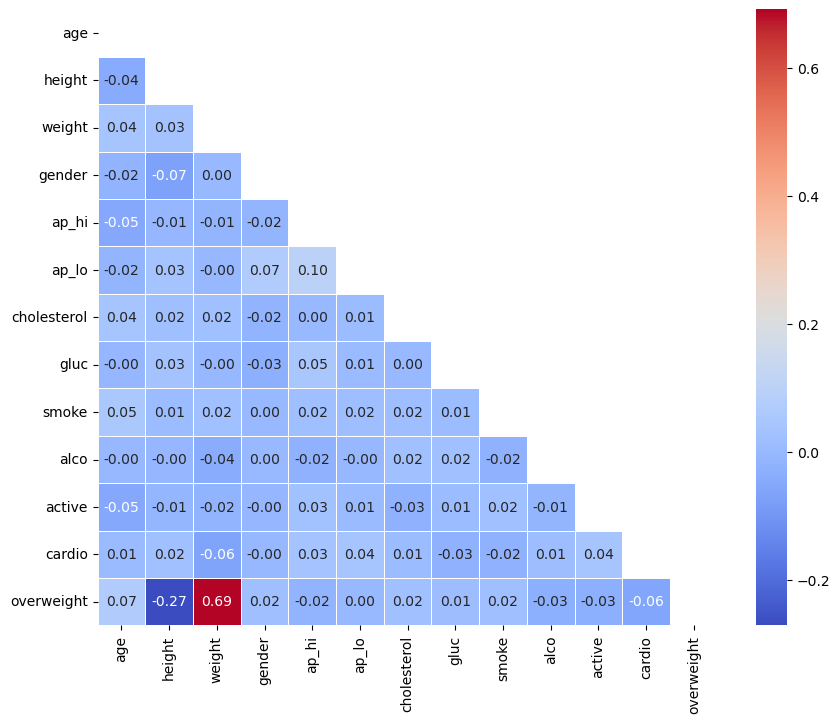

In [62]:
# Calculate the correlation matrix
corr = df_heat.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Plot the heatmap
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)

# Show the plot
plt.show()
